In [ ]:
`!pip install pyarrow geopandas plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 2023-1.parquet to 2023-1.parquet
Saving 2023-2.parquet to 2023-2.parquet
Saving 2023-3.parquet to 2023-3.parquet
Saving 2023-4.parquet to 2023-4.parquet
Saving 2023-5.parquet to 2023-5.parquet
Saving 2023-6.parquet to 2023-6.parquet
Saving 2023-7.parquet to 2023-7.parquet
Saving 2023-8.parquet to 2023-8.parquet
Saving 2023-9.parquet to 2023-9.parquet
Saving 2023-10.parquet to 2023-10.parquet
Saving 2023-11.parquet to 2023-11.parquet
Saving 2023-12.parquet to 2023-12.parquet


In [ ]:
import pandas as pd
import glob


sample_fraction = 0.02


file_list = glob.glob("*.parquet")


print("Files found:", file_list)


dfs = []
for file in file_list:
    print(f"Reading and sampling {file}...")
    df = pd.read_parquet(file)
    df_sampled = df.sample(frac=sample_fraction, random_state=42)
    dfs.append(df_sampled)


df_combined = pd.concat(dfs, ignore_index=True)


df_combined.to_csv("yellow_tripdata_2023_sampled.csv", index=False)

print("Final shape of combined DataFrame:", df_combined.shape)
df_combined.head()


Files found: ['2023-6.parquet', '2023-1.parquet', '2023-4.parquet', '2023-10.parquet', '2023-2.parquet', '2023-11.parquet', '2023-12.parquet', '2023-9.parquet', '2023-3.parquet', '2023-8.parquet', '2023-7.parquet', '2023-5.parquet']
Reading and sampling 2023-6.parquet...
Reading and sampling 2023-1.parquet...
Reading and sampling 2023-4.parquet...
Reading and sampling 2023-10.parquet...
Reading and sampling 2023-2.parquet...
Reading and sampling 2023-11.parquet...
Reading and sampling 2023-12.parquet...
Reading and sampling 2023-9.parquet...
Reading and sampling 2023-3.parquet...
Reading and sampling 2023-8.parquet...
Reading and sampling 2023-7.parquet...
Reading and sampling 2023-5.parquet...
Final shape of combined DataFrame: (758571, 20)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,1,2023-04-27 07:38:13,2023-04-27 07:45:38,1.0,1.40,1.0,N,236,43,1,9.3,2.5,0.5,1.70,0.0,1.0,15.00,2.5,0.0,NaN
1,2,2023-04-01 18:42:32,2023-04-01 19:08:03,1.0,5.06,1.0,N,236,144,1,27.5,0.0,0.5,6.30,0.0,1.0,37.80,2.5,0.0,NaN
2,2,2023-04-09 08:07:00,2023-04-09 08:09:29,1.0,0.65,1.0,N,140,140,1,5.8,0.0,0.5,2.94,0.0,1.0,12.74,2.5,0.0,NaN
3,2,2023-04-26 20:38:53,2023-04-26 21:01:45,1.0,3.23,1.0,N,170,231,1,21.9,1.0,0.5,5.38,0.0,1.0,32.28,2.5,0.0,NaN
4,1,2023-04-01 16:13:34,2023-04-01 16:20:25,3.0,0.90,1.0,N,230,186,1,7.9,2.5,0.5,2.35,0.0,1.0,14.25,2.5,0.0,NaN


In [ ]:

print("Columns and datatypes:")
print(df_combined.dtypes)


df_combined['tpep_pickup_datetime'] = pd.to_datetime(df_combined['tpep_pickup_datetime'])
df_combined['tpep_dropoff_datetime'] = pd.to_datetime(df_combined['tpep_dropoff_datetime'])


print("\nMissing values:")
print(df_combined.isnull().sum())


print("\nSummary statistics:")
print(df_combined[['fare_amount', 'trip_distance', 'tip_amount']].describe())


Columns and datatypes:
VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
airport_fee                     float64
dtype: object

Missing values:
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           25782
trip_distance     

In [ ]:

df_combined = df_combined[df_combined['trip_distance'] < 100]


df_combined = df_combined[df_combined['fare_amount'] < 500]


df_combined = df_combined[
    (df_combined['fare_amount'] > 0) &
    (df_combined['trip_distance'] > 0) &
    (df_combined['tip_amount'] >= 0)
]

print("Shape after cleaning:", df_combined.shape)


Shape after cleaning: (743712, 20)


In [ ]:
categorical_cols = df_combined.select_dtypes(include='object').columns.tolist()
numerical_cols = df_combined.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Variables:", categorical_cols)
print("Numerical Variables:", numerical_cols)


Categorical Variables: ['store_and_fwd_flag']
Numerical Variables: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'airport_fee']


<ipython-input-8-4cc39848d62b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df_combined, palette='coolwarm')


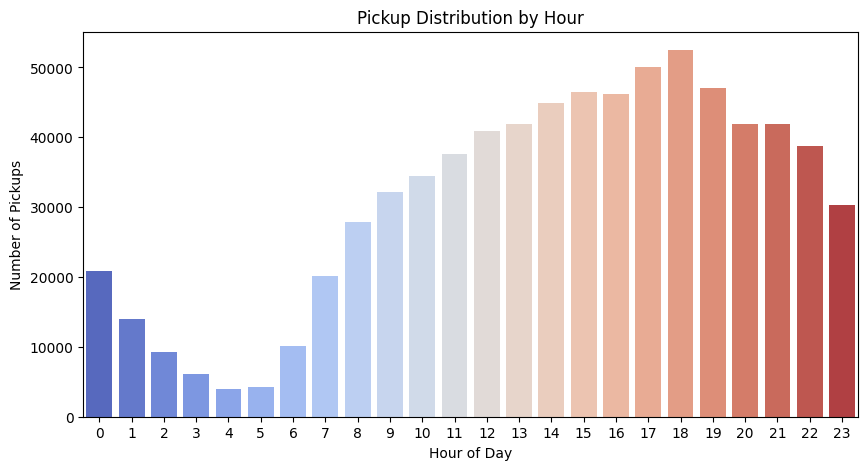

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_combined['hour'] = df_combined['tpep_pickup_datetime'].dt.hour
df_combined['day_of_week'] = df_combined['tpep_pickup_datetime'].dt.dayofweek
df_combined['month'] = df_combined['tpep_pickup_datetime'].dt.month

plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df_combined, palette='coolwarm')
plt.title('Pickup Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()


In [ ]:

categorical_cols = df_combined.select_dtypes(include='object').columns.tolist()
numerical_cols = df_combined.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols += ['VendorID', 'RatecodeID', 'payment_type', 'PULocationID', 'DOLocationID', 'store_and_fwd_flag']
categorical_cols = list(set(categorical_cols))

numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

print("Categorical Variables:", categorical_cols)
print("Numerical Variables:", numerical_cols)


Categorical Variables: ['payment_type', 'VendorID', 'store_and_fwd_flag', 'DOLocationID', 'RatecodeID', 'PULocationID']
Numerical Variables: ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'airport_fee']


In [ ]:
df_combined['hour'] = df_combined['tpep_pickup_datetime'].dt.hour
df_combined['day_of_week'] = df_combined['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday
df_combined['month'] = df_combined['tpep_pickup_datetime'].dt.month


<ipython-input-11-9697b8b81caa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df_combined, palette='viridis')


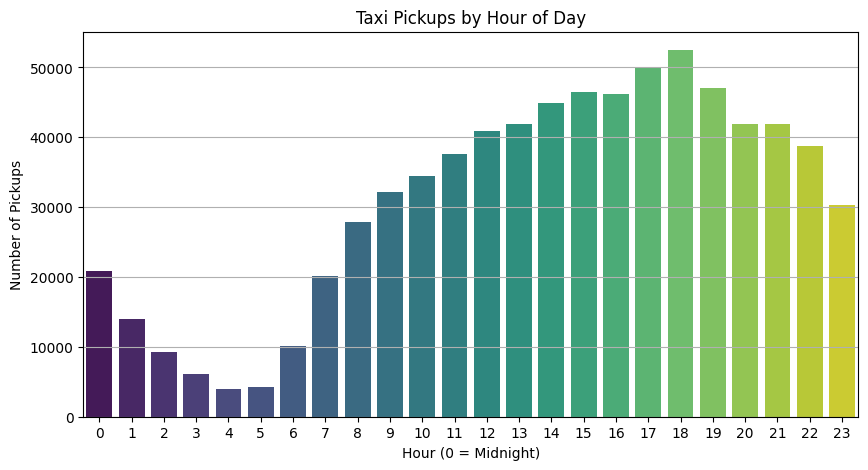

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df_combined, palette='viridis')
plt.title('Taxi Pickups by Hour of Day')
plt.xlabel('Hour (0 = Midnight)')
plt.ylabel('Number of Pickups')
plt.grid(axis='y')
plt.show()



<ipython-input-12-f801679638cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df_combined, palette='plasma')


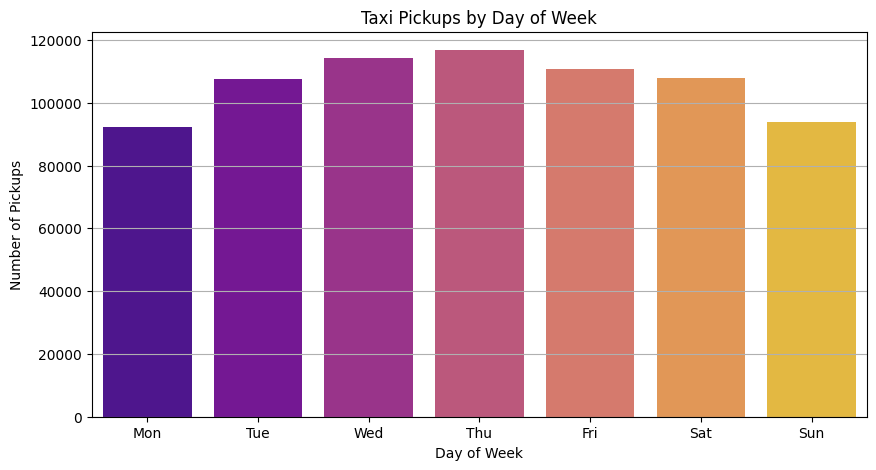

In [ ]:
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10,5))
sns.countplot(x='day_of_week', data=df_combined, palette='plasma')
plt.title('Taxi Pickups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(7), labels=day_labels)
plt.grid(axis='y')
plt.show()


<ipython-input-13-fc526b2fd107>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df_combined, palette='cubehelix')


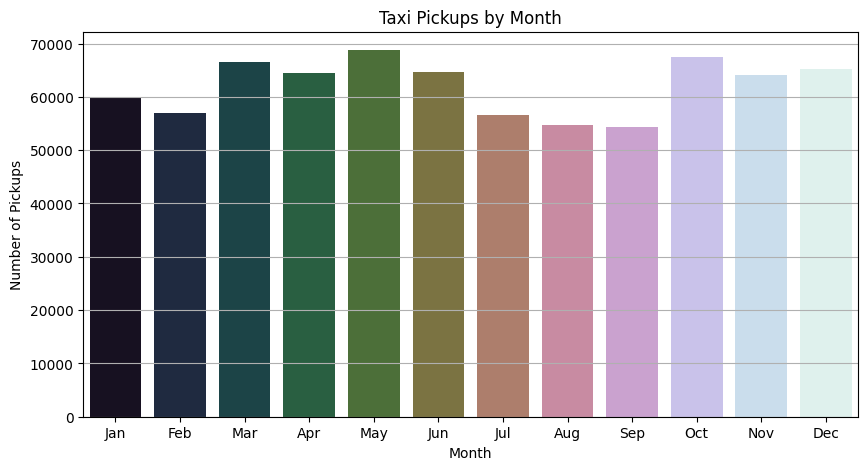

In [ ]:
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10,5))
sns.countplot(x='month', data=df_combined, palette='cubehelix')
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(12), labels=month_labels)
plt.grid(axis='y')
plt.show()


In [ ]:
# Filter trips
df_valid = df_combined[
    (df_combined['fare_amount'] > 0) &
    (df_combined['trip_distance'] > 0) &
    (df_combined['tip_amount'] >= 0)
]

print(f"Original dataset: {df_combined.shape[0]:,} rows")
print(f"After filtering invalid values: {df_valid.shape[0]:,} rows")


Original dataset: 743,712 rows
After filtering invalid values: 743,712 rows


<ipython-input-15-707b1f24131f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='total_amount', data=monthly_revenue, palette='mako')


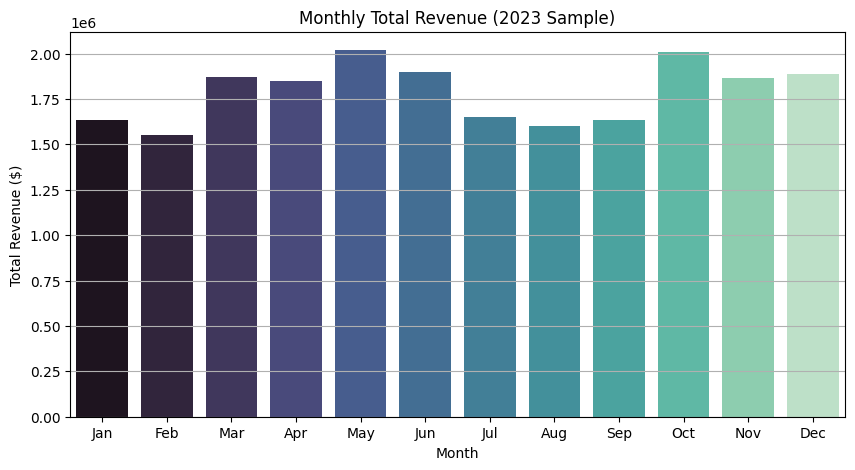

In [ ]:
monthly_revenue = df_valid.groupby('month')['total_amount'].sum().reset_index()

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_revenue['month'] = monthly_revenue['month'].apply(lambda x: month_labels[x - 1])

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='total_amount', data=monthly_revenue, palette='mako')
plt.title('Monthly Total Revenue (2023 Sample)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(axis='y')
plt.show()


<ipython-input-16-8a6e90cc7fb6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='revenue_share_%', data=quarterly_revenue, palette='Set2')


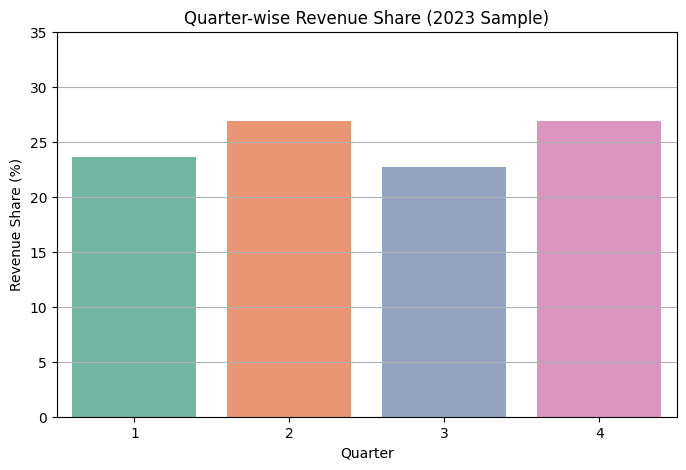

,quarter,total_amount,revenue_share_%
0,1,5060526.33,23.567630
1,2,5762899.37,26.838686
2,3,4884221.65,22.746552
3,4,5764712.89,26.847132


In [ ]:
df_valid['quarter'] = df_valid['tpep_pickup_datetime'].dt.quarter

quarterly_revenue = df_valid.groupby('quarter')['total_amount'].sum().reset_index()

total_annual_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['revenue_share_%'] = (quarterly_revenue['total_amount'] / total_annual_revenue) * 100

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x='quarter', y='revenue_share_%', data=quarterly_revenue, palette='Set2')
plt.title('Quarter-wise Revenue Share (2023 Sample)')
plt.xlabel('Quarter')
plt.ylabel('Revenue Share (%)')
plt.ylim(0, 35)
plt.grid(axis='y')
plt.show()

# Show values
quarterly_revenue


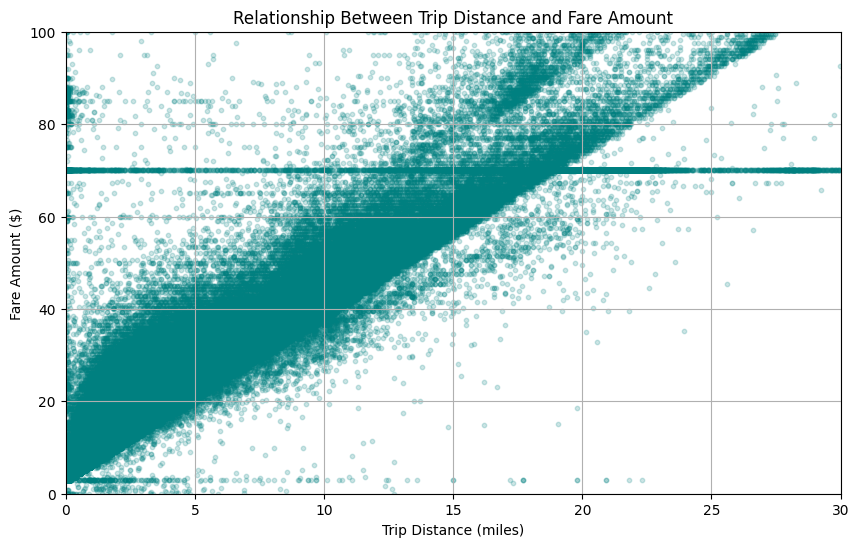

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    df_valid['trip_distance'],
    df_valid['fare_amount'],
    alpha=0.2,
    s=10,
    color='teal'
)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.xlim(0, 30)   # Optional: zoom into typical range
plt.ylim(0, 100)  # Optional: filter out extreme fares for better clarity
plt.show()


<ipython-input-18-23a9316609fb>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type_label', data=df_valid, order=df_valid['payment_type_label'].value_counts().index, palette='pastel')


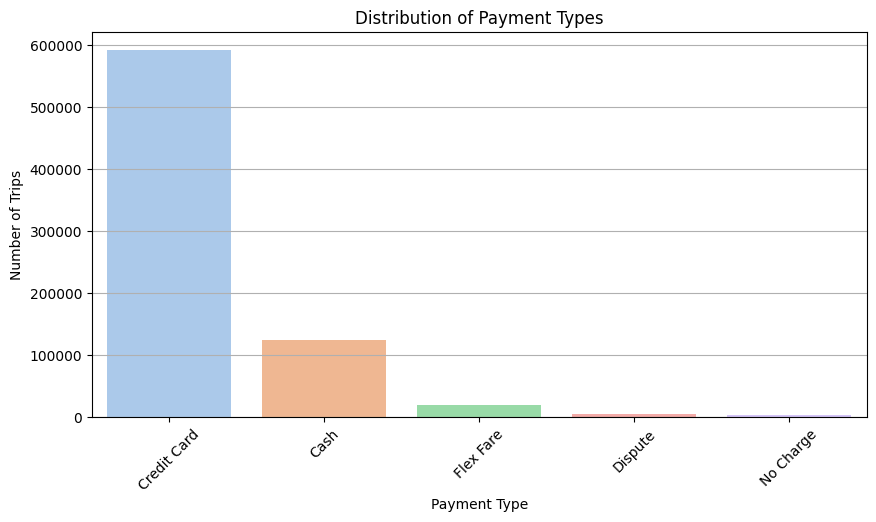

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

payment_type_map = {
    0: 'Flex Fare',
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

df_valid['payment_type_label'] = df_valid['payment_type'].map(payment_type_map)


plt.figure(figsize=(10, 5))
sns.countplot(x='payment_type_label', data=df_valid, order=df_valid['payment_type_label'].value_counts().index, palette='pastel')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving taxi_zones.dbf to taxi_zones.dbf
Saving taxi_zones.prj to taxi_zones.prj
Saving taxi_zones.sbn to taxi_zones.sbn
Saving taxi_zones.sbx to taxi_zones.sbx
Saving taxi_zones.shp to taxi_zones.shp
Saving taxi_zones.shp.xml to taxi_zones.shp.xml
Saving taxi_zones.shx to taxi_zones.shx


In [ ]:
import geopandas as gpd

zone_gdf = gpd.read_file("taxi_zones.shp")
zone_gdf.head()



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [ ]:
zone_gdf = zone_gdf.rename(columns={'LocationID': 'PULocationID'})

df_merged = df_valid.merge(zone_gdf, on='PULocationID', how='left')

df_merged[['PULocationID', 'zone', 'borough']].head()


,PULocationID,zone,borough
0,236,Upper East Side North,Manhattan
1,236,Upper East Side North,Manhattan
2,140,Lenox Hill East,Manhattan
3,170,Murray Hill,Manhattan
4,230,Times Sq/Theatre District,Manhattan


In [ ]:

zone_trip_counts = df_merged.groupby('zone').size().reset_index(name='num_trips')

zone_trip_counts = zone_trip_counts.sort_values(by='num_trips', ascending=False)

zone_trip_counts.head(10)


,zone,num_trips
115,JFK Airport,38291
218,Upper East Side South,35139
146,Midtown Center,34630
217,Upper East Side North,31446
147,Midtown East,26530
171,Penn Station/Madison Sq West,25703
124,LaGuardia Airport,25483
211,Times Sq/Theatre District,24939
128,Lincoln Square East,24760
155,Murray Hill,21910


In [ ]:
import geopandas as gpd

zone_gdf = gpd.read_file("taxi_zones.shp")
zone_gdf = zone_gdf.rename(columns={"LocationID": "PULocationID"})  # ensure correct join column


In [ ]:
df_merged = df_valid.merge(zone_gdf, on="PULocationID", how="left")


In [ ]:
zone_trip_counts = df_merged.groupby("zone").size().reset_index(name="num_trips")

zone_trip_counts = zone_trip_counts.sort_values(by="num_trips", ascending=False)

zone_trip_counts.head(10)


,zone,num_trips
115,JFK Airport,38291
218,Upper East Side South,35139
146,Midtown Center,34630
217,Upper East Side North,31446
147,Midtown East,26530
171,Penn Station/Madison Sq West,25703
124,LaGuardia Airport,25483
211,Times Sq/Theatre District,24939
128,Lincoln Square East,24760
155,Murray Hill,21910


In [ ]:
zone_gdf = zone_gdf.merge(zone_trip_counts, on="zone", how="left")
zone_gdf["num_trips"] = zone_gdf["num_trips"].fillna(0)  # fill missing with 0


In [ ]:
import geopandas as gpd

zone_gdf = gpd.read_file("taxi_zones.shp")
zone_gdf = zone_gdf.rename(columns={"LocationID": "PULocationID"})
zone_gdf.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,PULocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [ ]:
import geopandas as gpd

zone_gdf = gpd.read_file("taxi_zones.shp")

zone_gdf = zone_gdf.rename(columns={"LocationID": "PULocationID"})

zone_gdf.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,PULocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [ ]:
df_merged = df_valid.merge(zone_gdf, on="PULocationID", how="left")

df_merged[['PULocationID', 'zone', 'borough']].head()


,PULocationID,zone,borough
0,236,Upper East Side North,Manhattan
1,236,Upper East Side North,Manhattan
2,140,Lenox Hill East,Manhattan
3,170,Murray Hill,Manhattan
4,230,Times Sq/Theatre District,Manhattan


In [ ]:
zone_trip_counts = df_merged.groupby('zone').size().reset_index(name='num_trips')

zone_trip_counts = zone_trip_counts.sort_values(by='num_trips', ascending=False)

zone_trip_counts.head(10)


,zone,num_trips
115,JFK Airport,38291
218,Upper East Side South,35139
146,Midtown Center,34630
217,Upper East Side North,31446
147,Midtown East,26530
171,Penn Station/Madison Sq West,25703
124,LaGuardia Airport,25483
211,Times Sq/Theatre District,24939
128,Lincoln Square East,24760
155,Murray Hill,21910


In [ ]:
zone_gdf = zone_gdf.merge(zone_trip_counts, on='zone', how='left')

zone_gdf['num_trips'] = zone_gdf['num_trips'].fillna(0).astype(int)

zone_gdf[['zone', 'num_trips']].head()


,zone,num_trips
0,Newark Airport,20
1,Jamaica Bay,0
2,Allerton/Pelham Gardens,10
3,Alphabet City,898
4,Arden Heights,9


<Figure size 1200x1200 with 0 Axes>

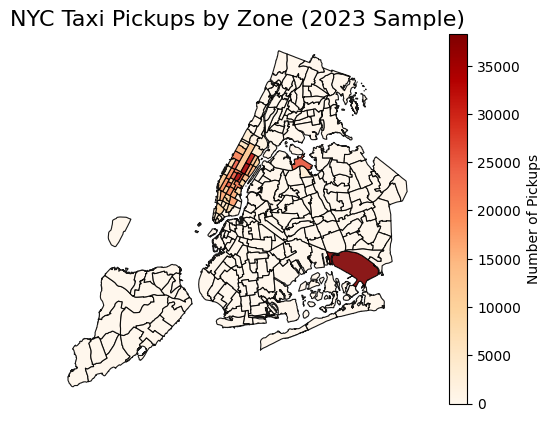

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

zone_gdf.plot(column='num_trips',
              cmap='OrRd',
              linewidth=0.8,
              edgecolor='black',
              legend=True,
              legend_kwds={'label': "Number of Pickups"},
              missing_kwds={"color": "lightgrey"},
              alpha=0.9)

plt.title("NYC Taxi Pickups by Zone (2023 Sample)", fontsize=16)
plt.axis('off')
plt.show()


DETAILED EDA

In [ ]:
df_valid['tpep_pickup_datetime'] = pd.to_datetime(df_valid['tpep_pickup_datetime'])
df_valid['tpep_dropoff_datetime'] = pd.to_datetime(df_valid['tpep_dropoff_datetime'])

df_valid['trip_duration_hr'] = (df_valid['tpep_dropoff_datetime'] - df_valid['tpep_pickup_datetime']).dt.total_seconds() / 3600

df_valid = df_valid[(df_valid['trip_duration_hr'] > 0) & (df_valid['trip_distance'] > 0)]

df_valid['avg_speed_mph'] = df_valid['trip_distance'] / df_valid['trip_duration_hr']

df_valid['avg_speed_mph'].describe()


<ipython-input-33-f63ca9ca4ee7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['avg_speed_mph'] = df_valid['trip_distance'] / df_valid['trip_duration_hr']


,avg_speed_mph
count,743654.000000
mean,12.167751
std,91.305479
min,0.002179
25%,7.200000
50%,9.688654
75%,13.407475
max,40140.000000


In [ ]:
route_speeds = df_valid.groupby(['PULocationID', 'DOLocationID'])['avg_speed_mph'].mean().reset_index()

min_trip_threshold = 30
route_counts = df_valid.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='trip_count')
route_speeds = route_speeds.merge(route_counts, on=['PULocationID', 'DOLocationID'])
route_speeds = route_speeds[route_speeds['trip_count'] >= min_trip_threshold]

zone_names = zone_gdf[['PULocationID', 'zone']].copy()
zone_names = zone_names.rename(columns={'zone': 'PU_zone'})

route_speeds = route_speeds.merge(zone_names, on='PULocationID', how='left')

zone_names = zone_gdf[['PULocationID', 'zone']].copy()
zone_names = zone_names.rename(columns={'PULocationID': 'DOLocationID', 'zone': 'DO_zone'})

route_speeds = route_speeds.merge(zone_names, on='DOLocationID', how='left')

slowest_routes = route_speeds.sort_values(by='avg_speed_mph').head(10)
slowest_routes[['PU_zone', 'DO_zone', 'avg_speed_mph', 'trip_count']]


,PU_zone,DO_zone,avg_speed_mph,trip_count
1708,Midtown Center,Times Sq/Theatre District,5.135705,1066
1780,Midtown East,Times Sq/Theatre District,5.191378,859
1766,Midtown East,Midtown Center,5.572714,971
1998,Murray Hill,Times Sq/Theatre District,5.583361,643
2351,UN/Turtle Bay South,Garment District,5.594614,193
2375,UN/Turtle Bay South,Times Sq/Theatre District,5.651505,291
1664,Midtown Center,Clinton East,5.742205,746
2070,Penn Station/Madison Sq West,Times Sq/Theatre District,5.749709,1659
1676,Midtown Center,Garment District,5.790893,688
2828,World Trade Center,Seaport,5.848517,30


In [ ]:
slow_trips = df_valid[df_valid['avg_speed_mph'] < 5].sort_values(by='avg_speed_mph').head(10)

slow_trips = slow_trips.merge(
    zone_gdf[['PULocationID', 'zone']].rename(columns={'zone': 'PU_zone'}),
    on='PULocationID', how='left'
)

slow_trips = slow_trips.merge(
    zone_gdf[['PULocationID', 'zone']].rename(columns={'PULocationID': 'DOLocationID', 'zone': 'DO_zone'}),
    on='DOLocationID', how='left'
)

slow_trips[['PU_zone', 'DO_zone', 'trip_distance', 'trip_duration_hr', 'avg_speed_mph', 'fare_amount']]


,PU_zone,DO_zone,trip_distance,trip_duration_hr,avg_speed_mph,fare_amount
0,JFK Airport,JFK Airport,0.05,22.951389,0.002179,3.7
1,Flatiron,NaN,0.23,23.053611,0.009977,3.7
2,Garment District,Midtown South,0.27,23.919444,0.011288,8.6
3,Midtown Center,Midtown Center,0.29,23.059444,0.012576,4.4
4,JFK Airport,Midtown Center,0.01,0.787222,0.012703,70.0
5,JFK Airport,JFK Airport,0.01,0.677778,0.014754,70.0
6,Central Park,SoHo,0.09,5.676667,0.015854,3.0
7,Midtown Center,Midtown East,0.41,23.293056,0.017602,7.2
8,Flatiron,Flatiron,0.45,23.527222,0.019127,5.1
9,Upper East Side South,Upper East Side South,0.46,23.949167,0.019207,5.1


Top 5 Busiest Hours for Pickups:
    hour  num_trips
18    18      52486
17    17      50037
19    19      47030
15    15      46440
16    16      46252


<ipython-input-36-6fd07f7fcce6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='num_trips', data=hourly_trip_counts, palette='YlGnBu')


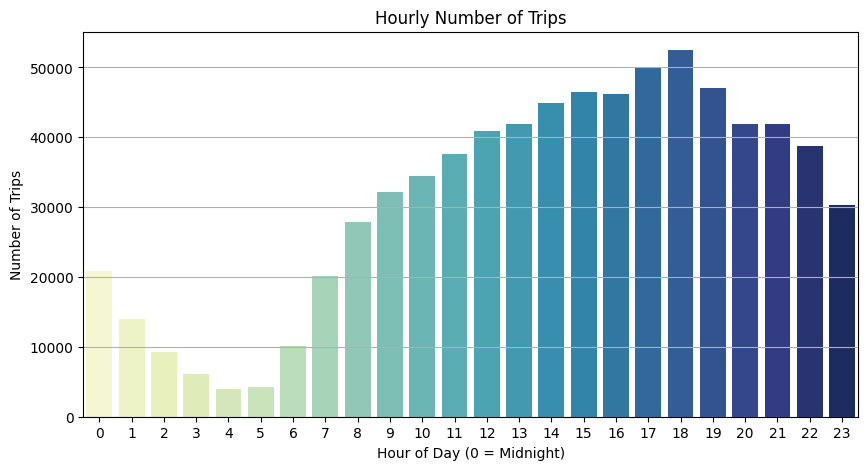

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_valid['hour'] = df_valid['tpep_pickup_datetime'].dt.hour

hourly_trip_counts = df_valid.groupby('hour').size().reset_index(name='num_trips')

busiest_hours = hourly_trip_counts.sort_values(by='num_trips', ascending=False)

print("Top 5 Busiest Hours for Pickups:")
print(busiest_hours.head())

plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='num_trips', data=hourly_trip_counts, palette='YlGnBu')
plt.title('Hourly Number of Trips')
plt.xlabel('Hour of Day (0 = Midnight)')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.show()


In [ ]:
sample_fraction = 0.02


In [ ]:
sample_fraction = 0.02

hourly_trip_counts['estimated_total_trips'] = (hourly_trip_counts['num_trips'] / sample_fraction).astype(int)

hourly_trip_counts.sort_values(by='estimated_total_trips', ascending=False).head()


,hour,num_trips,estimated_total_trips
18,18,52486,2624300
17,17,50037,2501850
19,19,47030,2351500
15,15,46440,2322000
16,16,46252,2312600


In [ ]:
total_sampled_trips = len(df_valid)
estimated_total_trips_2023 = int(total_sampled_trips / sample_fraction)

print(f"Sampled Trips: {total_sampled_trips:,}")
print(f"Estimated Total NYC Taxi Trips in 2023: {estimated_total_trips_2023:,}")


Sampled Trips: 743,654
Estimated Total NYC Taxi Trips in 2023: 37,182,700


In [ ]:
df_valid['day_of_week'] = df_valid['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df_valid['hour'] = df_valid['tpep_pickup_datetime'].dt.hour

df_valid['day_type'] = df_valid['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


In [ ]:
traffic_by_daytype = df_valid.groupby(['day_type', 'hour']).size().reset_index(name='num_trips')


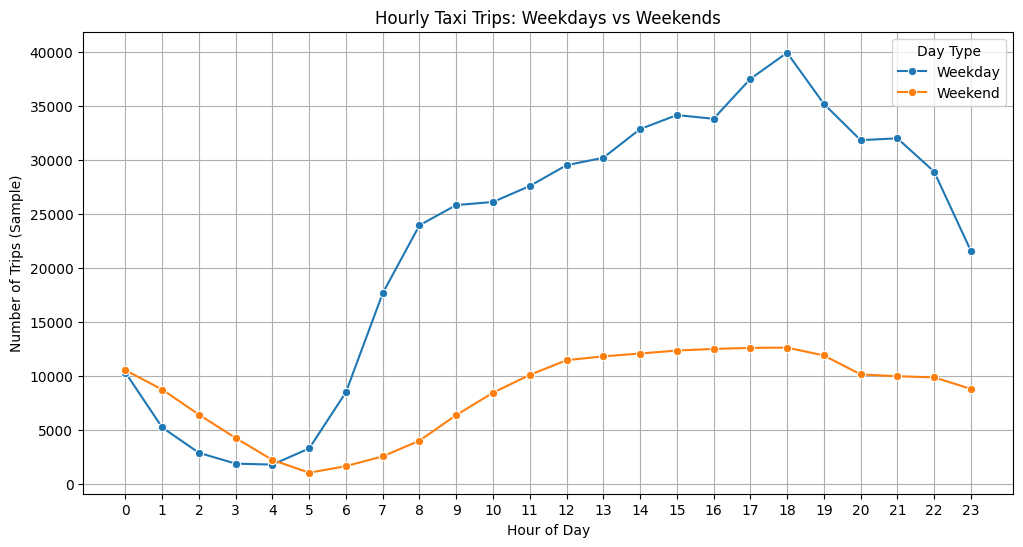

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=traffic_by_daytype, x='hour', y='num_trips', hue='day_type', marker='o')
plt.title('Hourly Taxi Trips: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips (Sample)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Day Type')
plt.show()


In [ ]:
do_zones = zone_gdf[['PULocationID', 'zone']].rename(columns={
    'PULocationID': 'DOLocationID',
    'zone': 'DO_zone'
})

df_merged = df_merged.merge(do_zones, on='DOLocationID', how='left')


In [ ]:
top_pu_zones = df_merged.groupby('zone').size().reset_index(name='num_pickups')
top_pu_zones = top_pu_zones.sort_values(by='num_pickups', ascending=False).head(10)

top_do_zones = df_merged.groupby('DO_zone').size().reset_index(name='num_dropoffs')
top_do_zones = top_do_zones.sort_values(by='num_dropoffs', ascending=False).head(10)

print("Top 10 Pickup Zones:")
print(top_pu_zones)

print("\nTop 10 Drop-off Zones:")
print(top_do_zones)


Top 10 Pickup Zones:
                             zone  num_pickups
115                   JFK Airport        38361
218         Upper East Side South        35142
146                Midtown Center        34632
217         Upper East Side North        31447
147                  Midtown East        26532
171  Penn Station/Madison Sq West        25706
124             LaGuardia Airport        25518
211     Times Sq/Theatre District        24940
128           Lincoln Square East        24760
155                   Murray Hill        21915

Top 10 Drop-off Zones:
                       DO_zone  num_dropoffs
229      Upper East Side North         33207
230      Upper East Side South         31599
154             Midtown Center         29133
223  Times Sq/Theatre District         22916
163                Murray Hill         22193
155               Midtown East         21033
232      Upper West Side South         20882
135        Lincoln Square East         20750
134            Lenox Hill West   

In [ ]:
pickup_counts = df_merged.groupby('zone').size().reset_index(name='num_pickups')

dropoff_counts = df_merged.groupby('DO_zone').size().reset_index(name='num_dropoffs')
dropoff_counts = dropoff_counts.rename(columns={'DO_zone': 'zone'})


In [ ]:
zone_flow = pd.merge(pickup_counts, dropoff_counts, on='zone', how='outer')

zone_flow['num_pickups'] = zone_flow['num_pickups'].fillna(0)
zone_flow['num_dropoffs'] = zone_flow['num_dropoffs'].fillna(0)

zone_flow['pickup_to_drop_ratio'] = zone_flow['num_pickups'] / (zone_flow['num_dropoffs'] + 1e-5)  # small value to avoid division by zero

zone_flow_sorted = zone_flow.sort_values(by='pickup_to_drop_ratio', ascending=False)

zone_flow_sorted.head(10)


,zone,num_pickups,num_dropoffs,pickup_to_drop_ratio
66,East Elmhurst,3344.0,375,8.917333
121,JFK Airport,38361.0,8540,4.491920
131,LaGuardia Airport,25518.0,9534,2.676526
180,Penn Station/Madison Sq West,25706.0,16303,1.576765
40,Central Park,12552.0,9069,1.384056
106,Greenwich Village South,9915.0,7297,1.358778
242,West Village,16498.0,12314,1.339776
155,Midtown East,26532.0,21033,1.261446
135,Lincoln Square East,24760.0,20750,1.193253
154,Midtown Center,34632.0,29133,1.188755


In [ ]:
df_merged['hour'] = df_merged['tpep_pickup_datetime'].dt.hour


In [ ]:
hourly_pickups = df_merged.groupby(['zone', 'hour']).size().reset_index(name='num_pickups')

top_hourly_pu = hourly_pickups.sort_values(by='num_pickups', ascending=False).head(10)
top_hourly_pu


,zone,hour,num_pickups
2363,Midtown Center,18,2983
2362,Midtown Center,17,2854
1795,JFK Airport,22,2786
1788,JFK Airport,15,2686
1789,JFK Airport,16,2681
3545,Upper East Side South,18,2668
2364,Midtown Center,19,2663
3541,Upper East Side South,14,2660
3544,Upper East Side South,17,2656
3542,Upper East Side South,15,2636


In [ ]:
df_merged['drop_hour'] = df_merged['tpep_dropoff_datetime'].dt.hour

hourly_dropoffs = df_merged.groupby(['DO_zone', 'drop_hour']).size().reset_index(name='num_dropoffs')
hourly_dropoffs = hourly_dropoffs.rename(columns={'DO_zone': 'zone', 'drop_hour': 'hour'})

top_hourly_do = hourly_dropoffs.sort_values(by='num_dropoffs', ascending=False).head(10)
top_hourly_do


,zone,hour,num_dropoffs
4855,Upper East Side North,15,2587
4882,Upper East Side South,18,2571
4858,Upper East Side North,18,2505
4876,Upper East Side South,12,2446
4879,Upper East Side South,15,2386
4856,Upper East Side North,16,2373
4854,Upper East Side North,14,2336
4881,Upper East Side South,17,2327
4857,Upper East Side North,17,2323
4877,Upper East Side South,13,2276


In [ ]:
df_merged['hour'] = df_merged['tpep_pickup_datetime'].dt.hour

night_df = df_merged[(df_merged['hour'] >= 20) | (df_merged['hour'] < 6)]


In [ ]:
night_pickups_by_zone = night_df.groupby('zone').size().reset_index(name='night_pickups')

top_night_zones = night_pickups_by_zone.sort_values(by='night_pickups', ascending=False).head(10)
top_night_zones


,zone,night_pickups
104,JFK Airport,13641
66,East Village,10163
214,West Village,8895
134,Midtown Center,8549
195,Times Sq/Theatre District,8274
37,Clinton East,8154
117,Lincoln Square East,7329
113,LaGuardia Airport,6895
202,Upper East Side South,6718
157,Penn Station/Madison Sq West,6637


In [ ]:
df_merged['hour'] = df_merged['tpep_pickup_datetime'].dt.hour

df_merged['time_of_day'] = df_merged['hour'].apply(lambda h: 'Night' if (h >= 20 or h < 6) else 'Day')


In [ ]:
revenue_by_time = df_merged.groupby('time_of_day')['total_amount'].sum().reset_index()

total_revenue = revenue_by_time['total_amount'].sum()
revenue_by_time['revenue_share_%'] = (revenue_by_time['total_amount'] / total_revenue) * 100

revenue_by_time


,time_of_day,total_amount,revenue_share_%
0,Day,15355391.16,71.475776
1,Night,6127958.75,28.524224


In [ ]:
df_passenger_fare = df_valid[
    (df_valid['trip_distance'] > 0) &
    (df_valid['passenger_count'] > 0)
]

df_passenger_fare['fare_per_mile_per_passenger'] = (
    df_passenger_fare['fare_amount'] / df_passenger_fare['trip_distance']
) / df_passenger_fare['passenger_count']


<ipython-input-54-0c5675757cf8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passenger_fare['fare_per_mile_per_passenger'] = (


In [ ]:
avg_fare_per_passenger = df_passenger_fare.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

avg_fare_per_passenger['fare_per_mile_per_passenger'] = avg_fare_per_passenger['fare_per_mile_per_passenger'].round(2)

avg_fare_per_passenger


,passenger_count,fare_per_mile_per_passenger
0,1.0,10.47
1,2.0,6.39
2,3.0,3.62
3,4.0,4.44
4,5.0,1.60
5,6.0,1.44
6,8.0,88.88


In [ ]:
df_vendor_fare = df_valid[(df_valid['trip_distance'] > 0) & (df_valid['fare_amount'] > 0)]

df_vendor_fare['fare_per_mile'] = df_vendor_fare['fare_amount'] / df_vendor_fare['trip_distance']


In [ ]:
avg_fare_by_vendor = df_vendor_fare.groupby('VendorID')['fare_per_mile'].mean().reset_index()

avg_fare_by_vendor['fare_per_mile'] = avg_fare_by_vendor['fare_per_mile'].round(2)

vendor_map = {
    1: 'Creative Mobile',
    2: 'Curb Mobility',
    6: 'Myle Technologies',
    7: 'Helix'
}
avg_fare_by_vendor['vendor_name'] = avg_fare_by_vendor['VendorID'].map(vendor_map)

avg_fare_by_vendor


,VendorID,fare_per_mile,vendor_name
0,1,8.15,Creative Mobile
1,2,11.85,Curb Mobility
2,6,6.23,Myle Technologies


In [ ]:
df_tiered = df_valid[(df_valid['trip_distance'] > 0) & (df_valid['fare_amount'] > 0)]

def distance_tier(miles):
    if miles <= 2:
        return 'Short (0–2 mi)'
    elif miles <= 5:
        return 'Medium (2–5 mi)'
    else:
        return 'Long (>5 mi)'

df_tiered['distance_tier'] = df_tiered['trip_distance'].apply(distance_tier)

df_tiered['fare_per_mile'] = df_tiered['fare_amount'] / df_tiered['trip_distance']


In [ ]:
tiered_fare = df_tiered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

vendor_map = {
    1: 'Creative Mobile',
    2: 'Curb Mobility',
    6: 'Myle Technologies',
    7: 'Helix'
}
tiered_fare['vendor_name'] = tiered_fare['VendorID'].map(vendor_map)

tiered_fare['fare_per_mile'] = tiered_fare['fare_per_mile'].round(2)

tiered_fare


,VendorID,distance_tier,fare_per_mile,vendor_name
0,1,Long (>5 mi),4.42,Creative Mobile
1,1,Medium (2–5 mi),6.39,Creative Mobile
2,1,Short (0–2 mi),9.94,Creative Mobile
3,2,Long (>5 mi),4.49,Curb Mobility
4,2,Medium (2–5 mi),6.54,Curb Mobility
5,2,Short (0–2 mi),17.06,Curb Mobility
6,6,Long (>5 mi),4.24,Myle Technologies
7,6,Medium (2–5 mi),9.24,Myle Technologies
8,6,Short (0–2 mi),24.57,Myle Technologies


In [ ]:
tiered_fare = df_tiered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

vendor_map = {
    1: 'Creative Mobile',
    2: 'Curb Mobility',
    6: 'Myle Technologies',
    7: 'Helix'
}
tiered_fare['vendor_name'] = tiered_fare['VendorID'].map(vendor_map)

tiered_fare['fare_per_mile'] = tiered_fare['fare_per_mile'].round(2)

tiered_fare


,VendorID,distance_tier,fare_per_mile,vendor_name
0,1,Long (>5 mi),4.42,Creative Mobile
1,1,Medium (2–5 mi),6.39,Creative Mobile
2,1,Short (0–2 mi),9.94,Creative Mobile
3,2,Long (>5 mi),4.49,Curb Mobility
4,2,Medium (2–5 mi),6.54,Curb Mobility
5,2,Short (0–2 mi),17.06,Curb Mobility
6,6,Long (>5 mi),4.24,Myle Technologies
7,6,Medium (2–5 mi),9.24,Myle Technologies
8,6,Short (0–2 mi),24.57,Myle Technologies


In [ ]:
df_tips = df_valid[(df_valid['fare_amount'] > 0) & (df_valid['tip_amount'] >= 0)]

df_tips['tip_percentage'] = (df_tips['tip_amount'] / df_tips['fare_amount']) * 100


In [ ]:
tip_summary = df_tips['tip_percentage'].describe(percentiles=[0.25, 0.5, 0.75, 0.9])
print(tip_summary)


count    743654.000000
mean         20.925241
std         522.135063
min           0.000000
25%           8.583691
50%          23.902439
75%          29.069767
90%          34.879650
max      450000.000000
Name: tip_percentage, dtype: float64


In [ ]:
df_passenger = df_valid[df_valid['passenger_count'].between(1, 6)]

passenger_trend = df_passenger['passenger_count'].value_counts().sort_index().reset_index()
passenger_trend.columns = ['passenger_count', 'num_trips']

passenger_trend


,passenger_count,num_trips
0,1.0,544180
1,2.0,109808
2,3.0,27242
3,4.0,15116
4,5.0,9585
5,6.0,6381


In [ ]:
pickup_zones = zone_gdf[['PULocationID', 'zone']]

df_valid = df_valid.merge(pickup_zones, on='PULocationID', how='left')


In [ ]:
df_zone_passengers = df_valid[df_valid['passenger_count'].between(1, 6)]

zone_passenger_counts = df_zone_passengers.groupby(['zone', 'passenger_count']).size().reset_index(name='num_trips')

zone_passenger_counts.head()


,zone,passenger_count,num_trips
0,Allerton/Pelham Gardens,1.0,9
1,Allerton/Pelham Gardens,2.0,1
2,Alphabet City,1.0,534
3,Alphabet City,2.0,115
4,Alphabet City,3.0,33


In [ ]:
group_rides = zone_passenger_counts[zone_passenger_counts['passenger_count'] >= 3]

top_group_ride_zones = group_rides.groupby('zone')['num_trips'].sum().reset_index()
top_group_ride_zones = top_group_ride_zones.sort_values(by='num_trips', ascending=False).head(10)

top_group_ride_zones


,zone,num_trips
60,JFK Airport,3659
81,Midtown Center,2941
115,Times Sq/Theatre District,2928
121,Upper East Side South,2271
120,Upper East Side North,2130
65,LaGuardia Airport,1872
82,Midtown East,1863
68,Lincoln Square East,1850
93,Penn Station/Madison Sq West,1826
32,East Chelsea,1813


In [ ]:
df_extra = df_valid[df_valid['extra'] > 0]


In [ ]:
extra_by_zone = df_extra.groupby('zone').size().reset_index(name='extra_applied_count')

zone_total = df_valid.groupby('zone').size().reset_index(name='total_trips')
extra_zone_ratio = extra_by_zone.merge(zone_total, on='zone')
extra_zone_ratio['extra_ratio'] = extra_zone_ratio['extra_applied_count'] / extra_zone_ratio['total_trips']


top_extra_zones = extra_zone_ratio.sort_values(by='extra_ratio', ascending=False).head(10)
top_extra_zones


,zone,extra_applied_count,total_trips,extra_ratio
21,Bronx Park,1,1,1.000000
195,Willets Point,1,1,1.000000
189,West Brighton,1,1,1.000000
100,LaGuardia Airport,25170,25482,0.987756
53,East Elmhurst,2820,3341,0.844059
109,Lower East Side,6273,7798,0.804437
80,Greenwich Village South,7737,9913,0.780490
2,Arrochar/Fort Wadsworth,6,8,0.750000
60,East Village,13133,17630,0.744923
192,West Village,12105,16497,0.733770


In [ ]:
df_valid['hour'] = df_valid['tpep_pickup_datetime'].dt.hour
extra_by_hour = df_extra['hour'].value_counts().sort_index().reset_index()
extra_by_hour.columns = ['hour', 'extra_trip_count']

total_by_hour = df_valid['hour'].value_counts().sort_index().reset_index()
total_by_hour.columns = ['hour', 'total_trip_count']

hourly_extra_ratio = extra_by_hour.merge(total_by_hour, on='hour')
hourly_extra_ratio['extra_ratio'] = hourly_extra_ratio['extra_trip_count'] / hourly_extra_ratio['total_trip_count']

hourly_extra_ratio.sort_values(by='extra_ratio', ascending=False)


,hour,extra_trip_count,total_trip_count,extra_ratio
21,21,39891,41916,0.951689
2,2,8804,9256,0.951167
1,1,13170,13927,0.945645
22,22,36527,38734,0.943022
20,20,39391,41915,0.939783
23,23,28435,30330,0.937521
0,0,19490,20793,0.937335
3,3,5683,6089,0.933322
4,4,3352,3971,0.844120
18,18,41559,52489,0.791766
